### The dataset provides an enchanting glimpse into the world of music through Spotify's Top Hit Playlist spanning over a decade. Let's embark on a melodious journey filled with rhythm, beats, and insights!

#### Methodlogies used:

📈 Trend Analysis: Unveil the evolution of music trends over the years, discovering which genres, artists, or tracks dominated each era.

🔍 Exploratory Data Analysis (EDA): Delve into the depths of the dataset using powerful analytical tools to uncover hidden patterns and correlations.

🌟 Feature Engineering: Craft innovative features and metrics to capture the essence of musical excellence, paving the way for groundbreaking discoveries.

📊 Statistical Analysis: Apply sophisticated statistical methods to unravel the secrets behind what makes a song soar to the top of the charts.

🎨 Visualizations: Transform raw data into captivating visual narratives, utilizing mesmerizing charts and graphs to convey complex musical insights.

🔥 Hot Trends: Identify rising stars and burgeoning musical phenomena, predicting future hits before they make it big on the charts.

💡 Predictive Modeling: Harness the power of machine learning algorithms to forecast potential chart-toppers and anticipate future musical trends.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-top-hit-playlist-2010-2022/playlist_2010to2023.csv


# Importing Dataset

In [2]:
import pandas as pd

# Try reading the CSV file with different encodings
encodings = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings:
    try:
        d = pd.read_csv("/kaggle/input/spotify-top-hit-playlist-2010-2022/playlist_2010to2023.csv", encoding=encoding)
        # If successful, break the loop
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding {encoding}. Trying next encoding...")

# Display the first few rows of the DataFrame
d.head()

Failed to read with encoding utf-8. Trying next encoding...


,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,6naxalmIoLFWR0siv8dnQQ,Oops!...I Did It Again,81,Oops!... I Did It Again,26dSoYclwsYLMAKD3tpOr4,Britney Spears,"['dance pop', 'pop']",81,...,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,211160,4
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,83,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",79,...,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,167067,4
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,66,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",62,...,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,250547,4
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,0v1XpBHnsbkCn7iJ9Ucr1l,It's My Life,81,Crush,58lV9VcRSjABbAbfWS6skp,Bon Jovi,"['glam metal', 'rock']",79,...,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,224493,4
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,75,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",70,...,-4.843,0,0.0479,0.0310,0.001200,0.0821,0.861,172.638,200400,4


# Data Preprocessing

In [3]:
d.shape

(2400, 23)

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   playlist_url       2400 non-null   object 
 1   year               2400 non-null   int64  
 2   track_id           2400 non-null   object 
 3   track_name         2400 non-null   object 
 4   track_popularity   2400 non-null   int64  
 5   album              2400 non-null   object 
 6   artist_id          2400 non-null   object 
 7   artist_name        2400 non-null   object 
 8   artist_genres      2400 non-null   object 
 9   artist_popularity  2400 non-null   int64  
 10  danceability       2400 non-null   float64
 11  energy             2400 non-null   float64
 12  key                2400 non-null   int64  
 13  loudness           2400 non-null   float64
 14  mode               2400 non-null   int64  
 15  speechiness        2400 non-null   float64
 16  acousticness       2400 

In [5]:
d.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,2011.500000,70.277083,75.882500,0.661767,0.688705,5.238333,-5.811735,0.589167,0.097995,0.164838,0.013442,0.174978,0.536023,120.456363,224695.583750,3.975000
std,6.923629,12.958245,12.016746,0.140335,0.165345,3.596909,2.086712,0.492088,0.093276,0.210630,0.082364,0.134153,0.228995,27.640203,41652.938998,0.240276
min,2000.000000,0.000000,36.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.750000,65.000000,68.000000,0.573750,0.585000,2.000000,-6.846000,0.000000,0.037900,0.018075,0.000000,0.090475,0.359750,98.061500,199050.500000,4.000000
50%,2011.500000,72.000000,77.000000,0.673000,0.706000,5.000000,-5.526500,1.000000,0.056800,0.073600,0.000000,0.120500,0.544000,120.000000,220953.500000,4.000000
75%,2017.250000,78.000000,85.000000,0.760000,0.814000,8.000000,-4.381750,1.000000,0.115000,0.233000,0.000057,0.225000,0.726000,137.644500,245467.000000,4.000000
max,2023.000000,96.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.979000,0.974000,210.857000,613027.000000,5.000000


In [6]:
d.columns

Index(['playlist_url', 'year', 'track_id', 'track_name', 'track_popularity',
       'album', 'artist_id', 'artist_name', 'artist_genres',
       'artist_popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

# Data Cleaning

### Checking For Missing Values

In [7]:
d.isnull().sum()

playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

### no missing value found

## Checking For Duplicates

In [8]:
# Mark all duplicate rows as True
duplicate_rows = d.duplicated(keep=False)

# Filter the DataFrame to show duplicate rows
duplicates = d[duplicate_rows]

# Display the duplicate rows
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [playlist_url, year, track_id, track_name, track_popularity, album, artist_id, artist_name, artist_genres, artist_popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature]
Index: []

[0 rows x 23 columns]


###  no duplicates found 

In [9]:
d.head()

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,6naxalmIoLFWR0siv8dnQQ,Oops!...I Did It Again,81,Oops!... I Did It Again,26dSoYclwsYLMAKD3tpOr4,Britney Spears,"['dance pop', 'pop']",81,...,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,211160,4
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,83,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",79,...,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,167067,4
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,66,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",62,...,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,250547,4
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,0v1XpBHnsbkCn7iJ9Ucr1l,It's My Life,81,Crush,58lV9VcRSjABbAbfWS6skp,Bon Jovi,"['glam metal', 'rock']",79,...,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,224493,4
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,75,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",70,...,-4.843,0,0.0479,0.0310,0.001200,0.0821,0.861,172.638,200400,4


## Dropping Unwanted Columns

In [10]:
d = d.drop(['playlist_url','track_id','artist_id'], axis = 1)
d.shape

(2400, 20)

In [11]:
d.head()

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2000,Oops!...I Did It Again,81,Oops!... I Did It Again,Britney Spears,"['dance pop', 'pop']",81,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,211160,4
1,2000,All The Small Things,83,Enema Of The State,blink-182,"['alternative metal', 'modern rock', 'pop punk...",79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,167067,4
2,2000,Breathe,66,Breathe,Faith Hill,"['contemporary country', 'country', 'country d...",62,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,250547,4
3,2000,It's My Life,81,Crush,Bon Jovi,"['glam metal', 'rock']",79,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,224493,4
4,2000,Bye Bye Bye,75,No Strings Attached,*NSYNC,"['boy band', 'dance pop', 'pop']",70,0.610,0.926,8,-4.843,0,0.0479,0.0310,0.001200,0.0821,0.861,172.638,200400,4


# EDA

## categorical and numerical features in the dataset

In [12]:
# Initialize lists to store categorical and numerical column names
categorical_cols = []
numerical_cols = []

# Iterate through each column in the DataFrame
for col in d.columns:
    # Check if the column dtype is object (indicating categorical data)
    if d[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

# Print the lists of categorical and numerical column names
print("Categorical Columns:")
print(categorical_cols)
print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['track_name', 'album', 'artist_name', 'artist_genres']

Numerical Columns:
['year', 'track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']


In [13]:
numerical_cols

['year',
 'track_popularity',
 'artist_popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

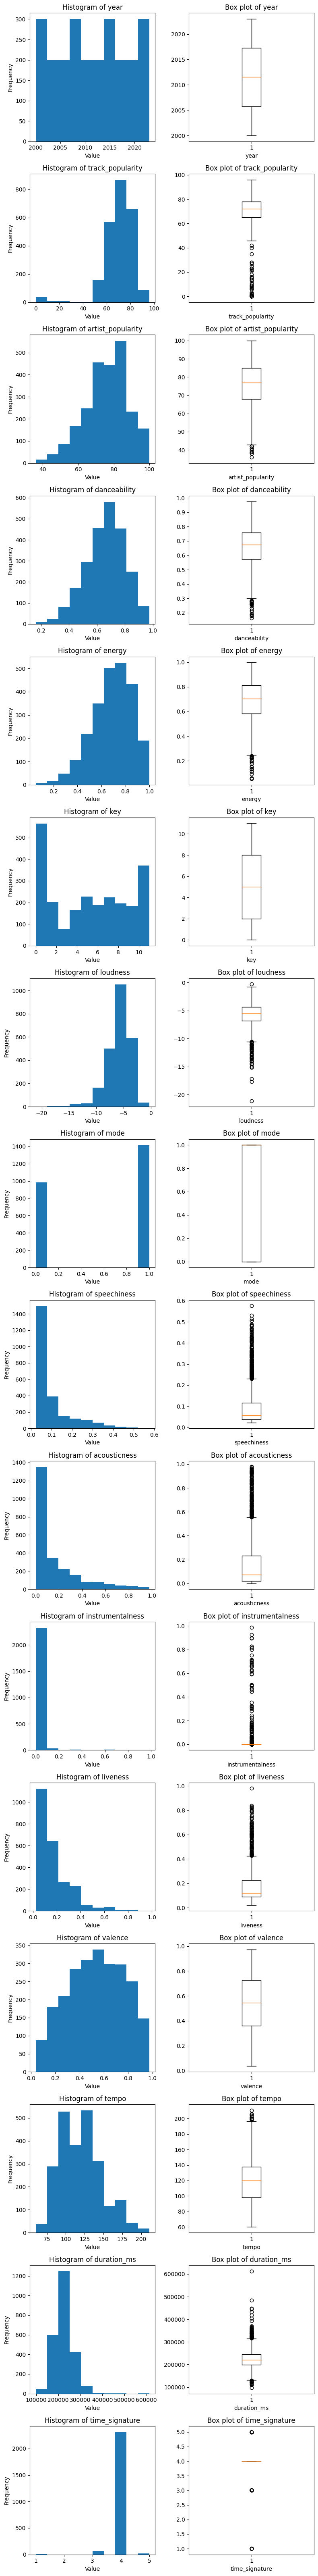

In [14]:
# Plot histograms and box plots as pairs on one line
fig, axs = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(8, len(numerical_cols) * 4))

for i, column in enumerate(numerical_cols):
    # Histogram
    axs[i, 0].hist(d[column], bins=10)
    axs[i, 0].set_xlabel('Value')
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 0].set_title(f'Histogram of {column}')
    
    # Box plot
    axs[i, 1].boxplot(d[column])
    axs[i, 1].set_xlabel(column)
    axs[i, 1].set_title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

## Audio Features

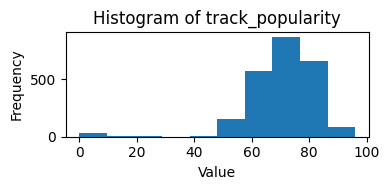

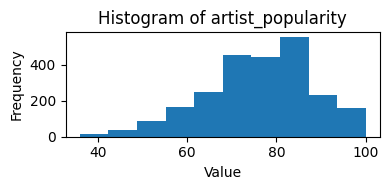

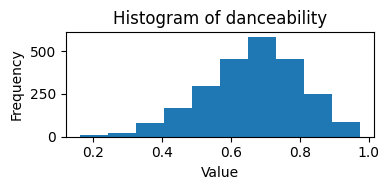

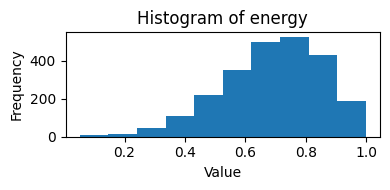

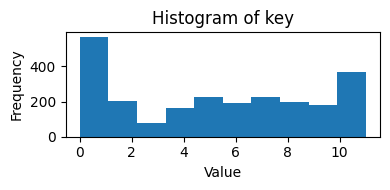

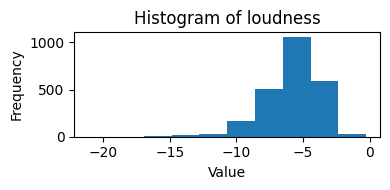

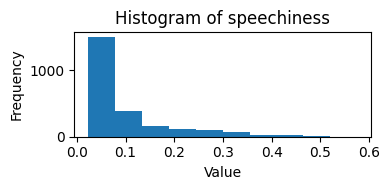

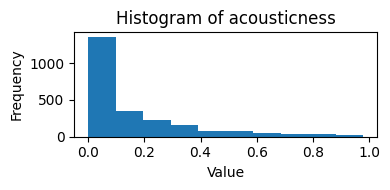

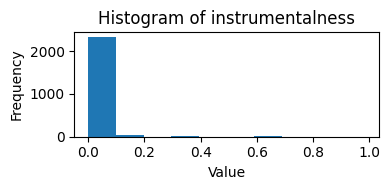

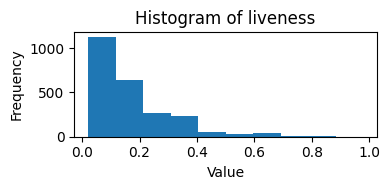

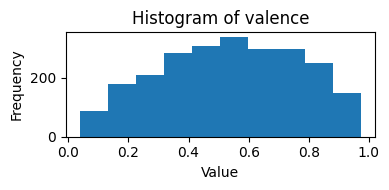

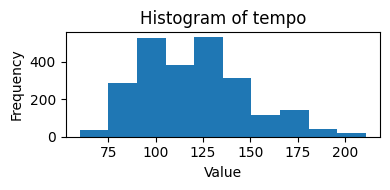

In [15]:
# Segment audio features
col_names = ['track_popularity', 'artist_popularity', 
             'danceability', 'energy', 'key',
             'loudness', 'speechiness', 
             'acousticness', 'instrumentalness',
             'liveness', 'valence', 'tempo',]
audio_features = d[col_names]

for column in col_names:
    plt.figure(figsize=(4, 2))
    plt.hist(d[column], bins=10)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()

### Distribution of Audio Features(Danceability,Energy) over years

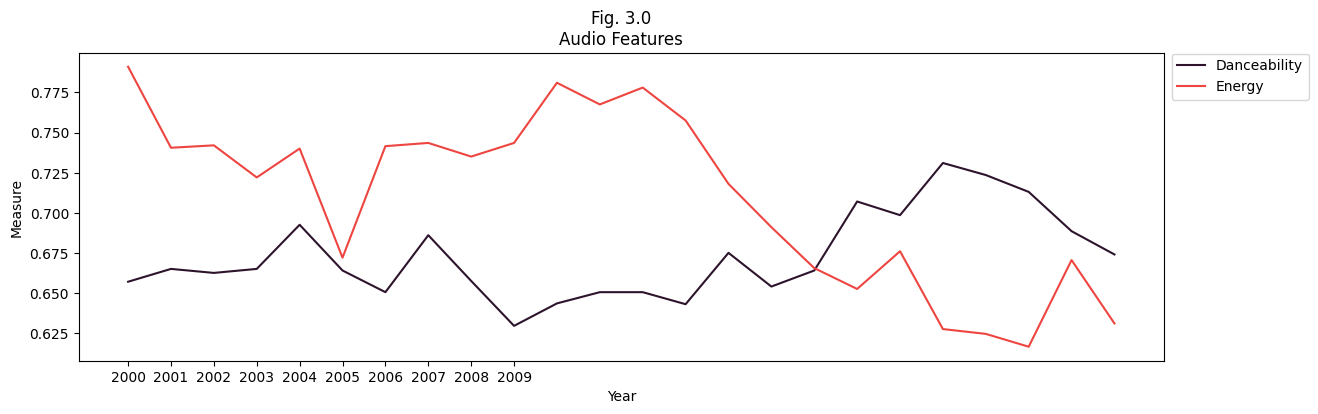

In [16]:
#Create new dataframe with selected columns for analysis.
df3=d[['track_name', 'year','danceability', 'energy',]].copy()
df3 = df3.set_index(['track_name'])
df3_year = df3.groupby('year').agg({'danceability': 'median', 'energy': 'median',})
ax_audio = df3_year.plot(kind='line',
                        color = [(45/255,20/255,44/255),(238/255,69/255,64/255)],
                        figsize = (14,4),
                        title = 'Fig. 3.0\nAudio Features',
                        xlabel = 'Year',
                        ylabel = 'Measure',
                        xticks = (np.arange(2000,2010,1.0))
                        )

#Change legend labels and position outside the graph
ax_audio.legend(["Danceability","Energy"],bbox_to_anchor=(1.14, 1.02));

#### The graph suggests that there is a negative correlation between danceability and energy, meaning that tracks with higher danceability tend to have lower energy and vice versa. This could imply that people prefer to dance to less intense and noisy tracks, or that more intense and noisy tracks are less suitable for dancing.

In [17]:
df3_year.corr()

,danceability,energy
danceability,1.000000,-0.749933
energy,-0.749933,1.000000


## Correlation between Numerical Columns

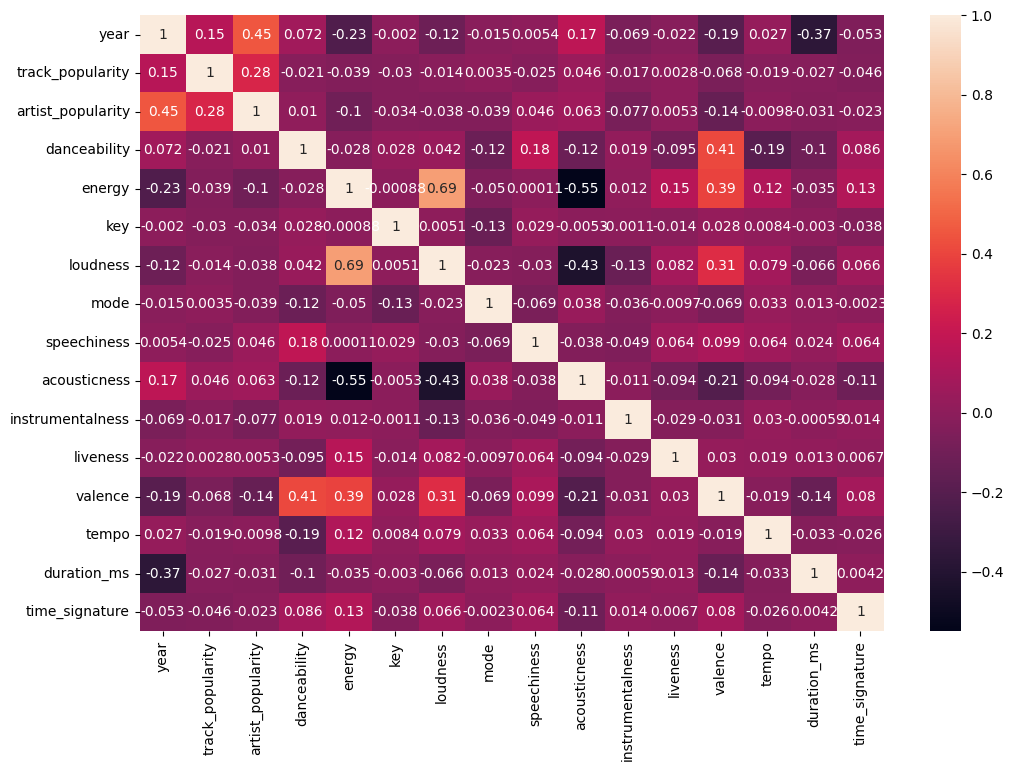

In [18]:
nums = d[numerical_cols]
corr_matrix = nums.corr()

# Heatmap for display
fig = plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Observations:

*   The target variable 'track_popularity' has positive correaltion(0.28) with artist_popularity and negative correlation with others.
*   The 'energy' variable which denotes how intense the song seems is positively correlated to loudness at 0.69 and negatively with acoustiness at           -0.54 (indiciating the degree of electrical amplification).
*   The 'valence' variable, predicting the positiveness of the song, is positively correlated 'danceability' at 0.41, 'loudness' at 0.39, and 'energy'       at 0.31.

In [19]:
categorical_cols

['track_name', 'album', 'artist_name', 'artist_genres']

## Top 10 Most Popular Tracks from 2000 to 2010

In [20]:
d['track_name'].value_counts()

track_name
Sorry                                         4
Don't                                         3
Burn                                          3
Rise                                          3
Home                                          3
                                             ..
Makes Me Wonder                               1
The Way I Live                                1
LoveStoned / I Think She Knows (Interlude)    1
Heartbroken - Edit                            1
Feather                                       1
Name: count, Length: 2220, dtype: int64

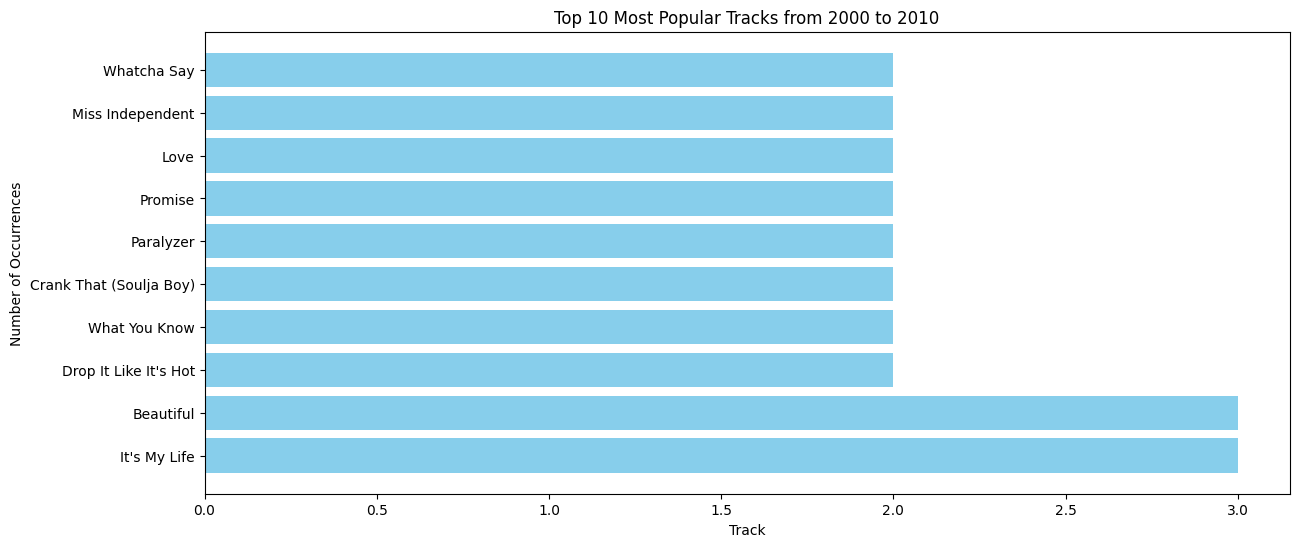

In [21]:
d = d[(d['year'] >= 2000) & (d['year'] <= 2010)]

# Get the top 10 most popular artists
top_10_track = d['track_name'].value_counts().nlargest(10)

# Create a bar plot of the top 10 most popular artists
plt.figure(figsize=(14,6))
plt.barh(top_10_track.index, top_10_track.values, color='skyblue')
plt.xlabel('Track')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Popular Tracks from 2000 to 2010')
plt.show()

## Top 10 Most Popular Albums from 2000 to 2010

In [22]:
d['album'].value_counts()

album
Good Girl Gone Bad: Reloaded    7
Breakaway                       5
PCD                             5
The Dutchess                    5
Graduation                      5
                               ..
Let Me Love You                 1
Is This It                      1
Chariot - Stripped              1
Scissor Sisters                 1
Kris Allen                      1
Name: count, Length: 763, dtype: int64

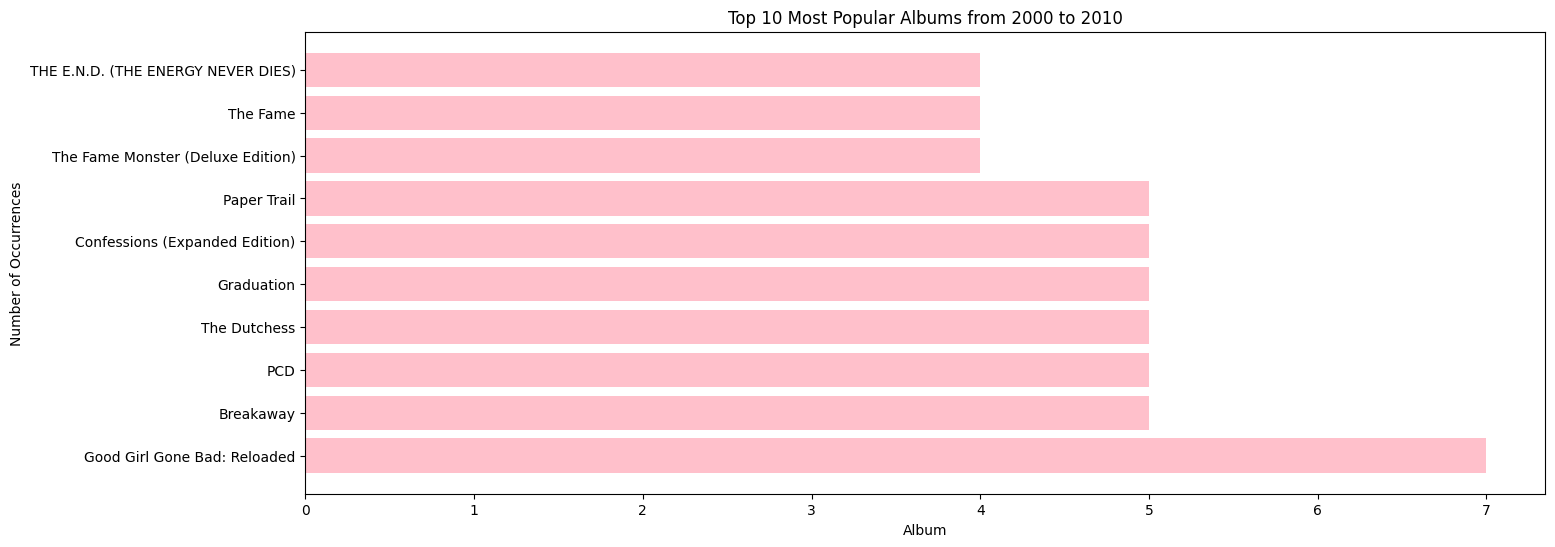

In [23]:
d = d[(d['year'] >= 2000) & (d['year'] <= 2010)]

# Get the top 10 most popular artists
top_10_album = d['album'].value_counts().nlargest(10)

# Create a bar plot of the top 10 most popular artists
plt.figure(figsize=(16,6))
plt.barh(top_10_album.index, top_10_album.values, color='pink')
plt.xlabel('Album')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Popular Albums from 2000 to 2010')
plt.show()

### Top 10 Most Popular Artists from 2000 to 2010

In [24]:
d['artist_name'].value_counts()

artist_name
Eminem            17
Rihanna           16
Britney Spears    15
Kanye West        14
Beyoncé           12
                  ..
Ashlee Simpson     1
N.E.R.D            1
Lloyd Banks        1
Sia                1
Kris Allen         1
Name: count, Length: 501, dtype: int64

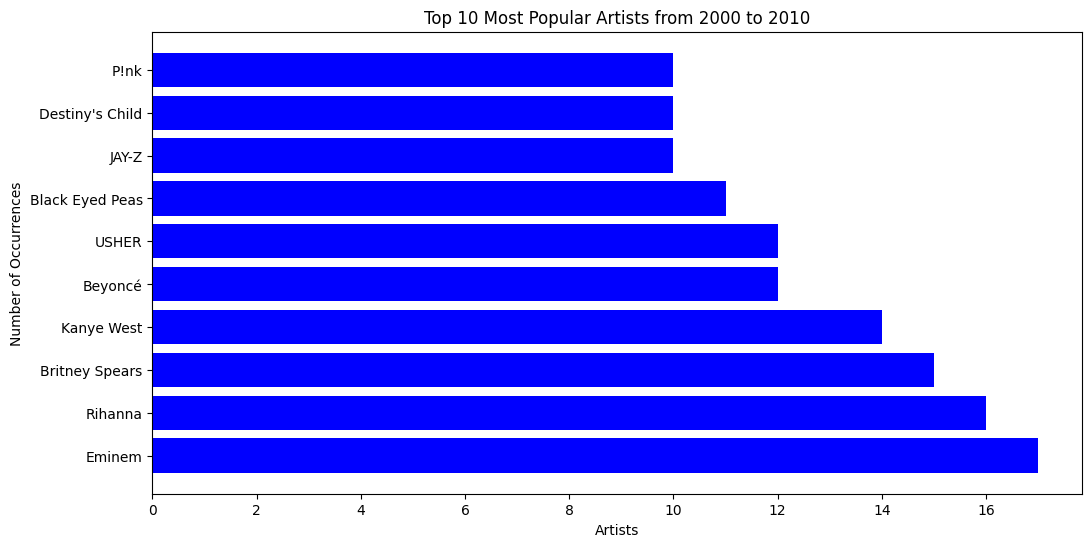

In [25]:
d = d[(d['year'] >= 2000) & (d['year'] <= 2010)]

# Get the top 10 most popular artists
top_10_artists = d['artist_name'].value_counts().nlargest(10)

# Create a bar plot of the top 10 most popular artists
plt.figure(figsize=(12,6))
plt.barh(top_10_artists.index, top_10_artists.values, color='blue')
plt.xlabel('Artists')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Popular Artists from 2000 to 2010')
plt.show()

# Top 10 Most Popular Artist Genres from 2000 to 2010

In [26]:
d['artist_genres'].value_counts()

artist_genres
['dance pop', 'pop']                                                          69
['dance pop', 'pop', 'pop rap']                                               18
['pop']                                                                       17
['detroit hip hop', 'hip hop', 'rap']                                         17
['barbadian pop', 'pop', 'urban contemporary']                                16
                                                                              ..
['garage rock', 'modern rock', 'pop rock']                                     1
['colombian pop', 'latin pop', 'mexican pop', 'rock en espanol']               1
['crunk', 'dirty south rap', 'north carolina hip hop', 'southern hip hop']     1
['finnish alternative rock', 'funk metal']                                     1
['idol', 'neo mellow', 'viral pop']                                            1
Name: count, Length: 403, dtype: int64

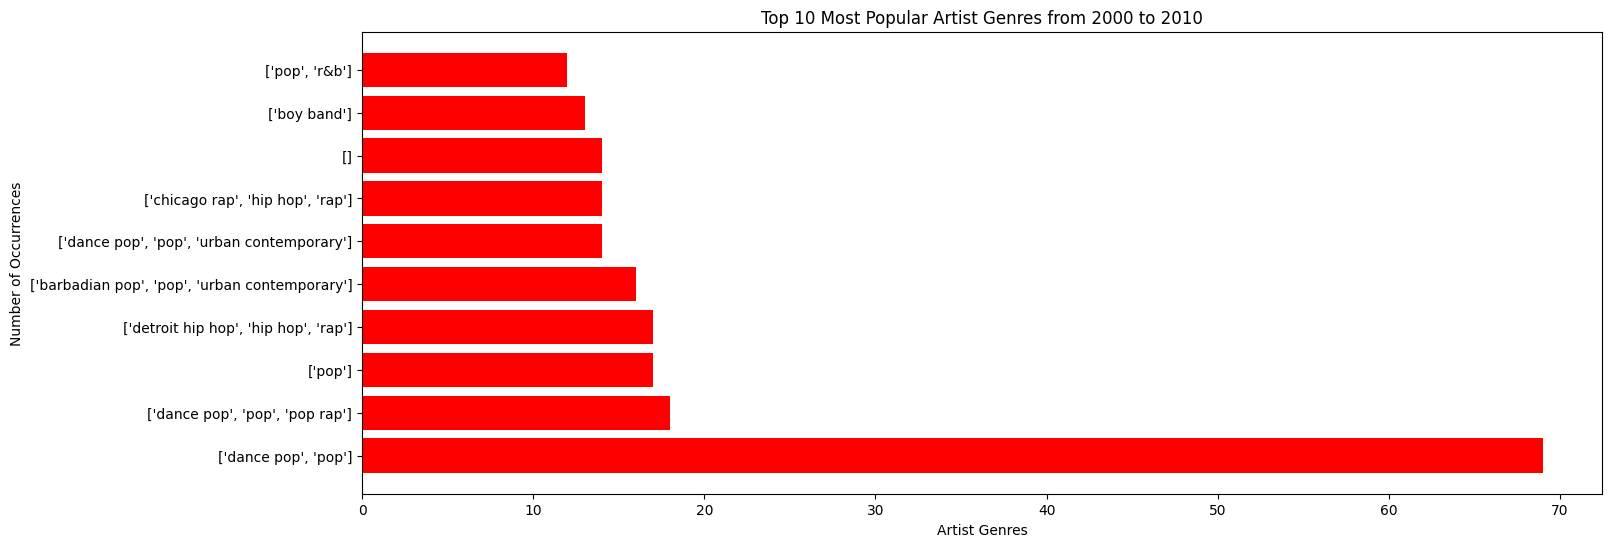

In [27]:
d = d[(d['year'] >= 2000) & (d['year'] <= 2010)]

# Get the top 10 most popular artists
top_10_artist_genres = d['artist_genres'].value_counts().nlargest(10)

# Create a bar plot of the top 10 most popular artists
plt.figure(figsize=(16,6))
plt.barh(top_10_artist_genres.index, top_10_artist_genres.values, color='red')
plt.xlabel('Artist Genres')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Popular Artist Genres from 2000 to 2010')
plt.show()

## Tracks vs Artist Scores (AVG)

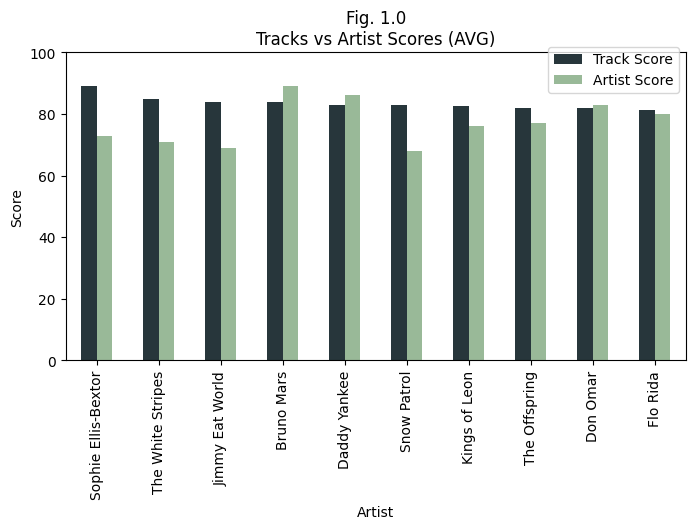

In [28]:
#Get average track popularity by artist and convert groupby output to dataframe for analysis
df_avg_track = d.groupby('artist_name').agg({'track_popularity': 'mean', 'artist_popularity': 'mean'})
df_avg_track1 = df_avg_track.reset_index()
df_avg_track1 = df_avg_track1.set_index(['artist_name'])

#Sort in descending order
df_avg_track1 = df_avg_track1.sort_values('track_popularity', ascending = False)

#Store and show list of top 10 artists with the highest average track ratings
df_avg_track_top10 = df_avg_track1.head(10)
ax = df_avg_track_top10.plot(kind='bar',
                       color = [(39/255,54/255,59/255),(153/255,185/255,152/255)],
                       figsize = (8,4),
                       title='Fig. 1.0\nTracks vs Artist Scores (AVG)',
                       xlabel = 'Artist',
                       ylabel = "Score",
                      )

#Set Y-axis limit to 100
ax.set_ylim(0,100)

#Change legend labels and position outside the graph
ax.legend(["Track Score", "Artist Score"], bbox_to_anchor=(1.0, 1.04));

### There is no direct correlation between the popularity scores and the average track scores when arranged in descending order. This suggests that artists with the highest average track scores may not necessarily be the most popular ones.

## Artist vs Track Scores (AVG)

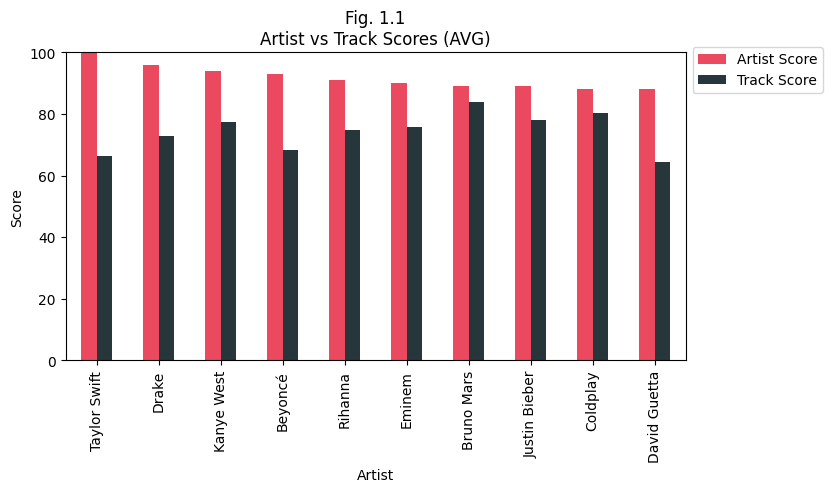

In [29]:
#Get average track popularity by artist and convert groupby output to dataframe for analysis
df_avg_score = d.groupby('artist_name').agg({'track_popularity': 'mean', 'artist_popularity': 'mean'})
df_avg_score1 = df_avg_score.reset_index()
df_avg_score1 = df_avg_score1.set_index(['artist_name'])
df_avg_score1 = df_avg_score1[['artist_popularity','track_popularity']]

#Sort in descending order
df_avg_score1 = df_avg_score1.sort_values('artist_popularity', ascending = False)

#Store and show list of top 10 artists with the highest average track ratings
df_avg_score_top10 = df_avg_score1.head(10)

ax1 = df_avg_score_top10.plot(kind='bar',
                       color = [(235/255,73/255,96/255),(39/255,54/255,59/255)],
                       figsize = (8,4),
                       title='Fig. 1.1\nArtist vs Track Scores (AVG)',
                       xlabel = 'Artist',
                       ylabel = 'Score',
                      )

#Set Y-axis limit to 100
ax1.set_ylim(0,100)

#Change legend labels and position outside the graph
ax1.legend(["Artist Score","Track Score"], bbox_to_anchor=(1.0, 1.04));

### It's evident that the majority of these artists have average track scores below 80 points, yet they maintain their positions among the top 10 most popular artists. This underscores once more that there exists no discernible correlation between average track scores and popularity scores.

In [30]:
df_avg_track_top10.corr()

,track_popularity,artist_popularity
track_popularity,1.000000,-0.305735
artist_popularity,-0.305735,1.000000


### This notebook is in progess, I will keep updating it. In case, you find it helpful, leave a upvote or comment for suggestions.

# Thankyou!